In [48]:
#importing important pakages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings 
warnings.filterwarnings('ignore')

In [49]:
#loading the dataset

df = pd.read_csv ('/home/rishi/ML_Course/Decision tree/Bank_Data.csv')


In [50]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [51]:
df.shape

(614, 13)

In [52]:
df.Loan_Status.value_counts()

Loan_Status
Y    422
N    192
Name: count, dtype: int64

In [53]:
# missing value 

df.isnull().sum()/len(df)

Loan_ID              0.000000
Gender               0.021173
Married              0.004886
Dependents           0.024430
Education            0.000000
Self_Employed        0.052117
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           0.035831
Loan_Amount_Term     0.022801
Credit_History       0.081433
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [55]:
df.describe(include = 'all')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614,601,611,599,614,582,614.000000,614.000000,592.000000,600.00000,564.000000,614,614
unique,614,2,2,4,2,2,NaN,NaN,NaN,NaN,NaN,3,2
top,LP001002,Male,Yes,0,Graduate,No,NaN,NaN,NaN,NaN,NaN,Semiurban,Y
freq,1,489,398,345,480,500,NaN,NaN,NaN,NaN,NaN,233,422
mean,NaN,NaN,NaN,NaN,NaN,NaN,5403.459283,1621.245798,146.412162,342.00000,0.842199,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,6109.041673,2926.248369,85.587325,65.12041,0.364878,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,150.000000,0.000000,9.000000,12.00000,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,2877.500000,0.000000,100.000000,360.00000,1.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,3812.500000,1188.500000,128.000000,360.00000,1.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,5795.000000,2297.250000,168.000000,360.00000,1.000000,NaN,NaN


**Missing value treatment**
 

1. if missing percentage is greater than 50 just drop that variable 

2. if missing percentage is less than 50 then we do missing value treatment 

    a. if the varible is object replace the missing value with mode 

    b. if the varible is numeric and there is no outliers then replace it with mean 
    
    c. if the variable is numeric and there is an outliers then replace it with median 

In [56]:
df['Gender'] = df.Gender.fillna('Male')

In [57]:
df['Married'] = df.Married.fillna('Yes')

In [58]:
df.Dependents.value_counts()

Dependents
0     345
1     102
2     101
3+     51
Name: count, dtype: int64

In [59]:
df['Dependents'] = df.Dependents.fillna('0')

In [60]:
df.Self_Employed.value_counts()

Self_Employed
No     500
Yes     82
Name: count, dtype: int64

In [61]:
df['Self_Employed'] = df.Self_Employed.fillna('No')

Outlier Treatment

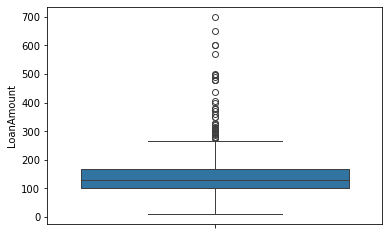

In [62]:
sns.boxplot(df['LoanAmount'])
plt.show()

In [63]:
df['LoanAmount'] = df.LoanAmount.fillna(128)

In [64]:
df['Loan_Amount_Term'] = df.Loan_Amount_Term.fillna(360)

In [65]:
df['Credit_History'] = df.Credit_History.fillna(1)

In [66]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [67]:
df['Loan_Amount_Term'] = df.Loan_Amount_Term.astype('str')

In [68]:
df['Credit_History'] = df.Credit_History.astype('str')

# Assignment

**Bivariate analysis** 

1. Whether the loan aproval is more in married or in unmarried ?  

2. Whether the loan approval is more in male vs female ? 


   a.  Whether the Female who is married has higher approval rate or Male who is married has the higher approval rate ? 



3. Does credit history has any impact on the loan approval ?

   b. What is the average income for the person where loan was approved vs average income for the person where loan was decline ?


4. Does the education has any impact on the loan approval ?

5. Whether the loan approval is higher when the coapplicant is present ?

6. Does the higher applicant income has any impact on the loan approval ?



In [69]:
# Q1 . 
x = pd.crosstab(df.Married,df.Loan_Status)
x

Loan_Status,N,Y
Married,,
No,79,134
Yes,113,288


In [70]:
x['approval_rate'] = x['Y']/(x['Y'] + x['N']) * 100

In [71]:
# Q1.Whether the loan aproval is more in married or in unmarried ?
# Answer --Loan aproval rate in married is higher than unmarried ie. 71.820449
x

Loan_Status,N,Y,approval_rate
Married,,,
No,79,134,62.910798
Yes,113,288,71.820449


In [72]:
#Q2.
y = pd.crosstab(df.Gender,df.Loan_Status)

In [73]:
y['approval_rate'] = y['Y']/(y['Y'] + y['N']) * 100
y

#  Whether the loan approval is more in male vs female ? 
# Ans--loan approval is more in male

Loan_Status,N,Y,approval_rate
Gender,,,
Female,37,75,66.964286
Male,155,347,69.123506


In [74]:
#Q2a

z = pd.crosstab(df[df.Married == 'Yes'].Gender,df[df.Married == 'Yes'].Loan_Status)
z

Loan_Status,N,Y
Gender,,
Female,8,24
Male,105,264


In [75]:
#Whether the Female who is married has higher approval rate or Male who is married has the higher approval rate ? 
z['approval_rate'] = z['Y']/(z['Y'] + z['N']) * 100
z

Loan_Status,N,Y,approval_rate
Gender,,,
Female,8,24,75.000000
Male,105,264,71.544715


In [76]:
#Q3. Does credit history has any impact on the loan approval ?

y = pd.crosstab(df.Credit_History,df.Loan_Status)

In [77]:
y['approval_rate'] = y['Y']/(y['Y'] + y['N']) * 100
y

Loan_Status,N,Y,approval_rate
Credit_History,,,
0.0,82,7,7.865169
1.0,110,415,79.047619


In [78]:
#Q3b. What is the average income for the person where loan was approved vs average income for the person where loan was decline ?

temp1 = df[(df.Credit_History == '0.0') & (df.Loan_Status == 'Y') ]

In [79]:
temp1.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
122,LP001431,Female,No,0,Graduate,No,2137,8980.0,137.0,360.0,0.0,Semiurban,Y
155,LP001536,Male,Yes,3+,Graduate,No,39999,0.0,600.0,180.0,0.0,Semiurban,Y
201,LP001677,Male,No,2,Graduate,No,4923,0.0,166.0,360.0,0.0,Semiurban,Y
267,LP001882,Male,Yes,3+,Graduate,No,4333,1811.0,160.0,360.0,0.0,Urban,Y
326,LP002068,Male,No,0,Graduate,No,4917,0.0,130.0,360.0,0.0,Rural,Y


In [80]:
# Q3b. Answer


# Average income for the person where loan was decline == 5446.078125
# Average income for the person where loan was approved == 5384.068720
df.groupby('Loan_Status')['ApplicantIncome'].mean()

Loan_Status
N    5446.078125
Y    5384.068720
Name: ApplicantIncome, dtype: float64

In [81]:
# Q4. Does the education has any impact on the loan approval ?

x = pd.crosstab(df.Education,df.Loan_Status)

In [82]:
x['approval_rate'] = x['Y']/(x['Y'] + x['N']) * 100
x

# Answer == Education has an impact on the loan approval

Loan_Status,N,Y,approval_rate
Education,,,
Graduate,140,340,70.833333
Not Graduate,52,82,61.194030


In [83]:
#5. whether the loan approval is higher when the coapplicant is present 
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [84]:
import numpy as np
df['Coapplicant_flag'] = np.where(df['CoapplicantIncome'] == 0 ,'No','Yes')

In [85]:
x = pd.crosstab(df.Coapplicant_flag
                ,df.Loan_Status)

In [86]:
x['approval_rate'] = x['Y']/(x['Y'] + x['N']) * 100

x

Loan_Status,N,Y,approval_rate
Coapplicant_flag,,,
No,96,177,64.835165
Yes,96,245,71.847507


In [87]:
# Q6.Does the higher applicant income has any impact on the loan approval ?

x = []

for i in df.ApplicantIncome:
    if (i > 0.0) & (i <= 2877.0):
        x.append('a.0-2877')
    elif (i > 2877) & (i <= 3812):
        x.append('b.2878-3812')
    elif (i > 3813) & (i <= 5795):
        x.append('c.3813-5795')
    else:
        x.append('d.Ge 5796')
        
df['income_bin'] = x        

In [88]:
x = pd.crosstab(df.income_bin
                ,df.Loan_Status)

x['approval_rate'] = x['Y']/(x['Y'] + x['N']) * 100

x

#Answer == higher applicant income has no any impact on the loan approval

Loan_Status,N,Y,approval_rate
income_bin,,,
a.0-2877,48,106,68.831169
b.2878-3812,48,105,68.627451
c.3813-5795,47,105,69.078947
d.Ge 5796,49,106,68.387097


**End of the assesment**

In [89]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Coapplicant_flag,income_bin
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y,No,d.Ge 5796
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,Yes,c.3813-5795
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,No,b.2878-3812
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,Yes,a.0-2877
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,No,d.Ge 5796


In [90]:
df.shape

(614, 15)

In [91]:
df.Loan_Status.value_counts()

Loan_Status
Y    422
N    192
Name: count, dtype: int64

In [92]:
df.Credit_History.value_counts()

Credit_History
1.0    525
0.0     89
Name: count, dtype: int64

In [93]:
df.Self_Employed.value_counts()

Self_Employed
No     532
Yes     82
Name: count, dtype: int64

In [94]:
df.Loan_Amount_Term.value_counts()

Loan_Amount_Term
360.0    526
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: count, dtype: int64

In [95]:
# Data Visualisation
import matplotlib.pyplot as plt 
import seaborn as sns

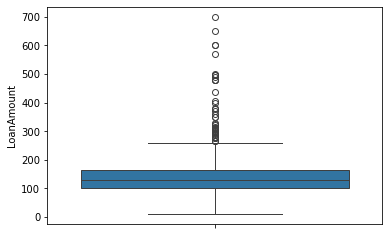

In [96]:
sns.boxplot(df['LoanAmount'])
plt.show()

In [97]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Coapplicant_flag,income_bin
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y,No,d.Ge 5796
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,Yes,c.3813-5795
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,No,b.2878-3812
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,Yes,a.0-2877
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,No,d.Ge 5796


In [98]:

import category_encoders as ce
encoder = ce.OrdinalEncoder(cols=['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status', 'Coapplicant_flag'])


df_1 = encoder.fit_transform(df)


In [99]:
df_1.drop(columns = 'Loan_ID',axis = 1, inplace = True)

In [110]:
df_1.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Coapplicant_flag,income_bin
0,1,1,1,1,1,5849,0.0,128.0,360.0,1.0,1,1,1,d.Ge 5796
1,1,2,2,1,1,4583,1508.0,128.0,360.0,1.0,2,2,2,c.3813-5795
2,1,2,1,1,2,3000,0.0,66.0,360.0,1.0,1,1,1,b.2878-3812
3,1,2,1,2,1,2583,2358.0,120.0,360.0,1.0,1,1,2,a.0-2877
4,1,1,1,1,1,6000,0.0,141.0,360.0,1.0,1,1,1,d.Ge 5796


In [101]:
X = df_1.drop(['Loan_Status','income_bin'], axis=1)

y = df_1['Loan_Status']

In [102]:
y

0      1
1      2
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    2
Name: Loan_Status, Length: 614, dtype: int64

In [103]:
from sklearn.tree import DecisionTreeClassifier
clf_gini = DecisionTreeClassifier(criterion='entropy',max_depth = 3 , min_samples_leaf = 50 )



# fit the model
clf_gini = clf_gini.fit(X, y)

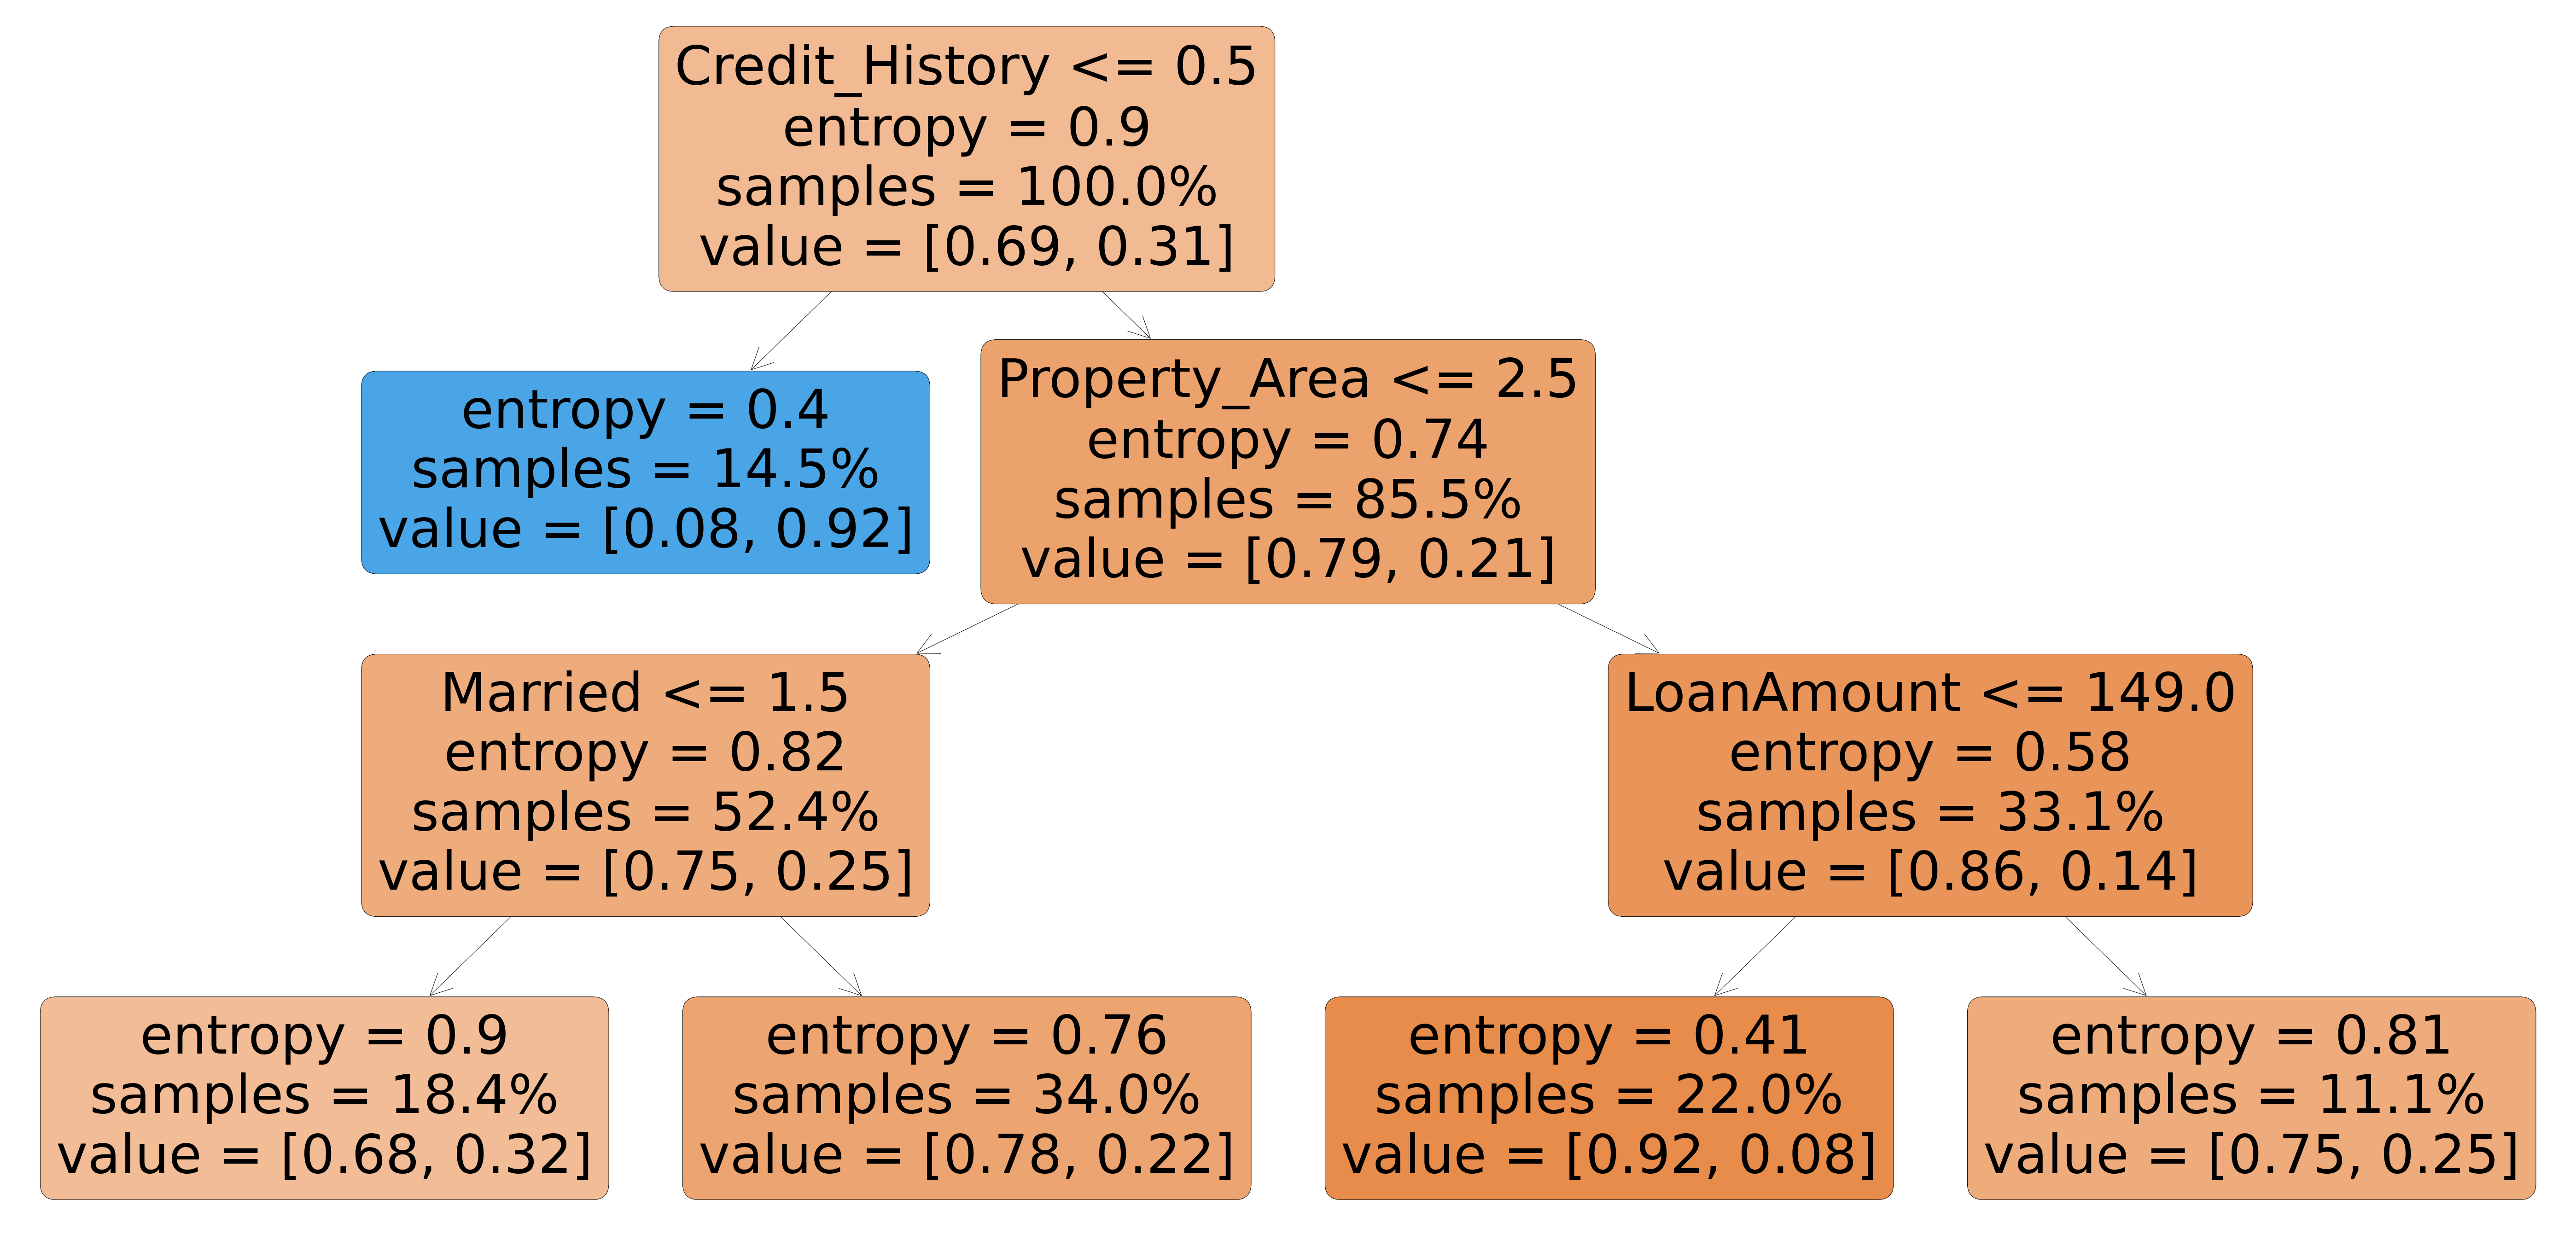

In [104]:
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # statistical data visualization
%matplotlib inline

plt.figure(figsize=(100,50))

from sklearn.tree import plot_tree 

a = plot_tree(decision_tree= clf_gini,feature_names = X.columns , filled = True , precision = 2 , rounded = True,
              proportion=True)



In [105]:
# if the credit history = 1 and the property_area > 2 and loan amount < 149 ----- 0.92 

# if the credit history = 1 and the property area <= 2 and the married > 1 --- 0.78 

In [106]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    int64  
 1   Married            614 non-null    int64  
 2   Dependents         614 non-null    int64  
 3   Education          614 non-null    int64  
 4   Self_Employed      614 non-null    int64  
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    object 
 9   Credit_History     614 non-null    object 
 10  Property_Area      614 non-null    int64  
 11  Coapplicant_flag   614 non-null    int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 57.7+ KB


In [107]:
X.Credit_History.value_counts()

Credit_History
1.0    525
0.0     89
Name: count, dtype: int64

In [108]:
# 1. if the credit history is 0 and co-applicant income is less than 9650 in that case the probaility of loan
# getting decile is 0.8

# 2. if the credit history is 0 and co-applicant income is greater than 9650 in that case the probaility of loan 
# getting approve is 0.79 

# 3. if the  Credit History is 1 and  the loan amount is greater than 547.5 the loan approval is 0.07

In [109]:
y_pred_gini = clf_gini.predict(X)
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y, y_pred_gini)))

Model accuracy score with criterion gini index: 0.8094
